## Final Project Submission

Please fill out:
* Student name: Scott Libby
* Student pace: full time
* Scheduled project review date/time: 05/15/2023
* Instructor name: David E.
* Blog post URL: 


In [1]:
import itertools
import numpy as np
import pandas as pd 
from numbers import Number
import sqlite3
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import linregress
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
import gzip
import pickle
import pandasql
import decimal

In [5]:
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')

# Cleaning Data
for col in tmdb_movies.select_dtypes(include=['object']):
    tmdb_movies[col] = tmdb_movies[col].str.lower()

tmdb_movies = tmdb_movies.rename(columns={'original_title': 'movie'})
tmdb_movies['genre_ids'] = tmdb_movies['genre_ids'].str.replace('[', '').str.replace(']', '')

tmdb_moviesCLEAN = tmdb_movies.applymap(lambda x: str(x).replace(',', '').replace('$', ''))

# Mapping Genre ID to Genre Name
genre_id_mapping = {
    '28': 'action',
    '12': 'adventure',
    '16': 'animation',
    '35': 'comedy',
    '80': 'crime',
    '99': 'documentary',
    '18': 'drama',
    '10751': 'family',
    '14': 'fantasy',
    '36': 'history',
    '27': 'horror',
    '10402': 'music',
    '9648': 'mystery',
    '878': 'science fiction',
    '10770': 'tv movie',
    '53': 'thriller',
    '10752': 'war',
    '37': 'western'
}

# Replace genre ID numbers with genre names in the 'genre_ids' column
for genre_id, genre_name in genre_id_mapping.items():
    tmdb_moviesCLEAN['genre_ids'] = tmdb_moviesCLEAN['genre_ids'].str.replace(genre_id, genre_name)

tmdb_moviesCLEAN.rename(columns={'movie': 'movieNAME'}, inplace=True)
GENRES7 = tmdb_moviesCLEAN[['movieNAME', 'genre_ids']].copy()

# Split and Format Genre Column
GENRES7['genre_ids'] = GENRES7['genre_ids'].str.split('|')

# Add a new column for each genre in the mapping
for genre_id, genre_name in genre_id_mapping.items():
    GENRES7[genre_name] = GENRES7['genre_ids'].apply(lambda x: genre_id in x).astype(int)

GENRES7['genre_ids'] = GENRES7['genre_ids'].astype(str).str.replace('[','').str.replace(']','').str.replace(' ','|').str.replace("'", "").str.replace(",", "")

# Iterate over the genre columns and transport the genre string values
for genre_id, genre_name in genre_id_mapping.items():
    GENRES7[genre_name] = 0
    GENRES7.loc[GENRES7['genre_ids'].apply(lambda x: genre_id in x), genre_name] = 1

# Map Genre Names to Integer Values
genre_order = ['action', 'adventure', 'animation', 'comedy', 'crime', 'documentary', 'drama', 'family', 'fantasy', 'history', 'horror', 'music', 'mystery', 'science fiction', 'tv movie', 'thriller', 'war', 'western']
genre_int_mapping = {genre_name: index+1 for index, genre_name in enumerate(genre_order)}

# Assign Integer Values Based on the Substring in the genre_ids Column
for genre_name in genre_order:
    GENRES7[genre_name] = 0

for index, row in GENRES7.iterrows():
    genre_list = row['genre_ids']
    for genre in genre_list:
        if genre in genre_int_mapping:
            genre_int = genre_int_mapping[genre]
            genre_name = genre_order[genre_int-1]
            GENRES7.at[index, genre_name] = genre_int

# Remove Duplicates and Reset Index
GENRES7 = GENRES7.drop_duplicates(subset='movieNAME', keep='first')
GENRES7 = GENRES7.reset_index(drop=True)

# Filter Genres to Plot
genre_columns = ['action', 'adventure', 'animation', 'comedy', 'crime', 'documentary', 'drama', 'family', 'fantasy', 'history', 'horror', 'music', 'mystery', 'science fiction', 'tv movie', 'war', 'western']
new_GENRES= GENRES7[genre_columns]
columns_to_plot = [col for col in new_GENRES.columns if new_GENRES[col].sum() > 0]
genres_to_plot = new_GENRES[columns_to_plot].sum().reset_index()
genres_to_plot.columns = ['genre', 'count']

IndexError: index 0 is out of bounds for axis 0 with size 0

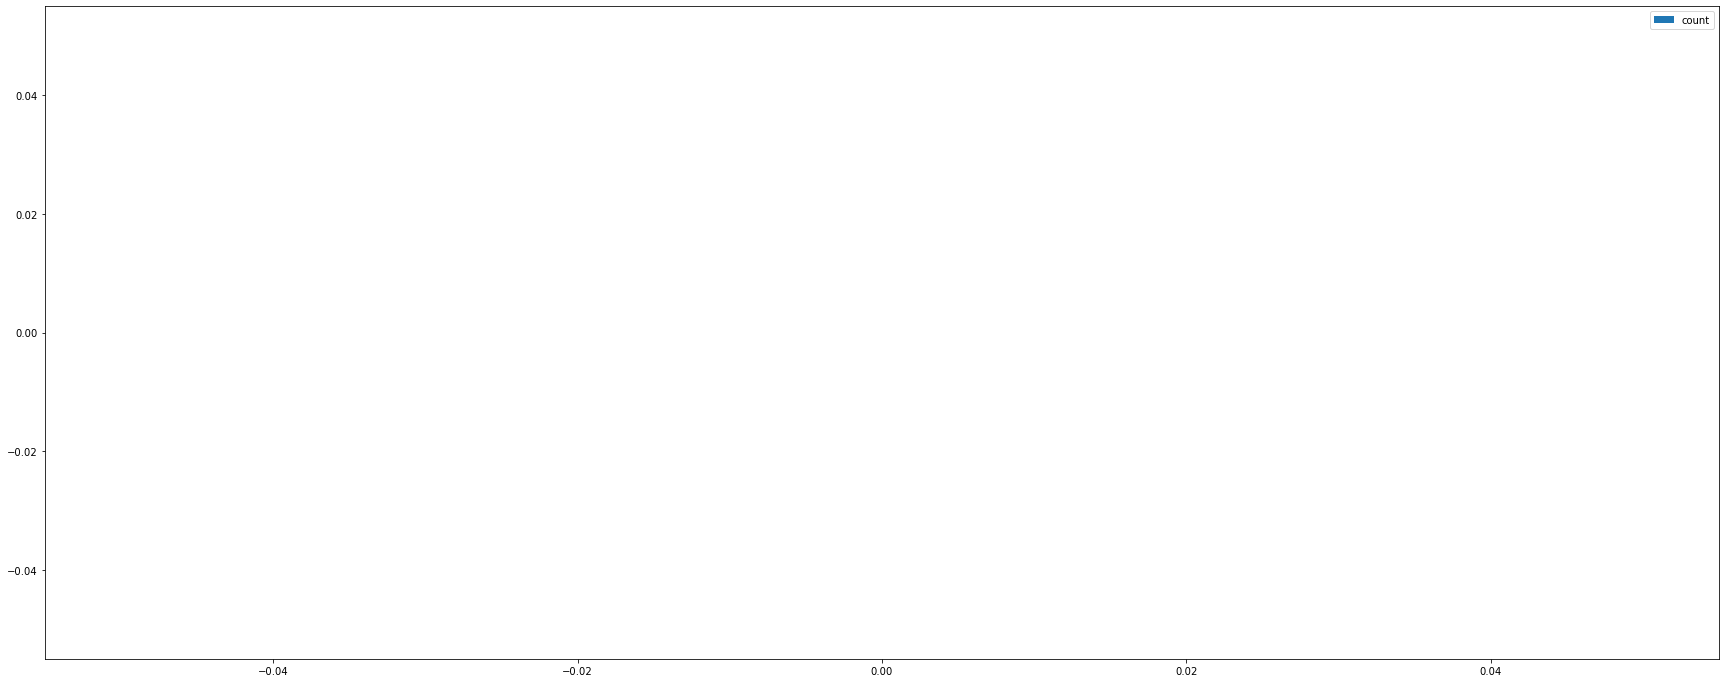

In [6]:
fig, ax = plt.subplots(figsize=(30, 12))  # Swap the figsize dimensions

# Use horizontal bar plot instead of vertical bar plot
genres_to_plot.plot.barh(y='count', x='genre', ax=ax, rot=0)

# Set the axis labels and title
ax.set_xlabel("Count", fontsize=25)  # Swap x and y labels
ax.set_ylabel("Genre", fontsize=25)  # Swap x and y labels
ax.set_ylabel("Genre", fontsize=16, rotation=45)

ax.set_title("Number of Movies by Genre", fontsize=20)

# Set the tick label font size
plt.xticks(fontsize=25, fontweight='bold')
plt.yticks(fontsize=25, fontweight='bold')

# Show the chart
plt.show()